# Лабороторная работа №8. 
## Метод прогонки с периодическими ГУ: XI.9.5 
## Ивакин Кирилл
![task.png](task.png)

# solution

In [15]:
import numpy as np              
import matplotlib.pyplot as plt

In [16]:
h = 0.005
N = int(1 / h) + 1

def P(x):
    return -10 - np.sin(2 * np.pi * x)

def f(x):
    return np.cos(2 * np.pi * x) * h**2

In [22]:
# инициализация диагоналей матрицы
A = np.array([1.0] * N)
C = A

i = np.arange(N)
B = 2.0 - P(i * h) * h**2

#инициализация правой части
F = np.array(list(map(f, h * i)))
F[-1] = (1 - h) * h**2

In [23]:
# найдём прогоночные коэффициенты
alpha = np.zeros(N)
betta = np.zeros(N)
gamma = np.zeros(N)

alpha[1] = C[0] / B[0]
for i in range(1, N - 1):
    alpha[i + 1] = C[i] / (B[i] - A[i] * alpha[i])
    
betta[1] = -F[0] / B[0]
for i in range(1, N - 1):
    betta[i + 1] = (-F[i] + A[i] * betta[i]) / (B[i] - A[i] * alpha[i])

gamma[1] = A[0] / B[0]
for i in range(1, N - 1):
    gamma[i + 1] = A[i] * gamma[i] / (B[i] - A[i] * alpha[i])

In [24]:
# обратная прогонка
p = np.zeros(N)
q = np.zeros(N)

p[-1] = - C[-1] / (A[-1] * (alpha[-1] + gamma[-1]) - B[-1])
for i in range(N - 1, -1, -1):
    p[i-1] = alpha[i] * p[i] + gamma[i] * p[-1]
    
q[-1] = (F[-1] - A[-1] * betta[-1]) / (A[-1] * (alpha[-1] + gamma[-1]) - B[-1])
for i in range(N - 1, -1, -1):
    q[i-1] = betta[i] + alpha[i] * q[i] + gamma[i] * q[-1]

In [25]:
y = np.zeros(N)
y[0] = q[0] / (1 - p[0])
for i in range(1, N):
    y[i] = p[i] * y[0] + q[i]

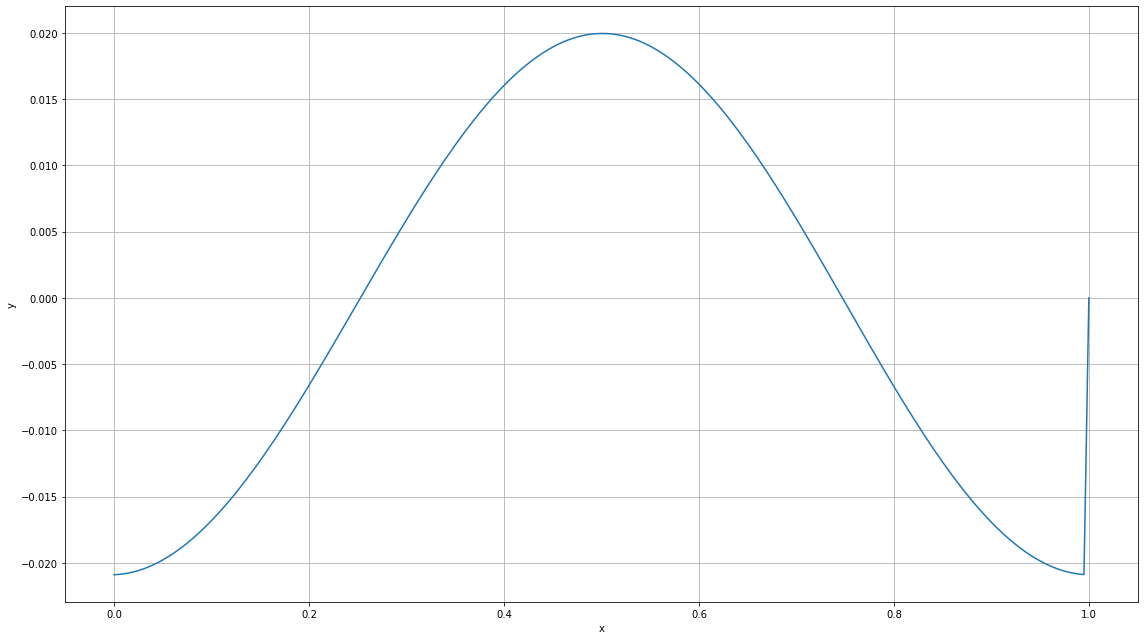

In [26]:
x = np.linspace(0, (N - 1) * h, N)
plt.figure(figsize = [16, 9])
plt.plot(x, y, label = 'y(x)')
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout() 
plt.grid()
plt.show()

# theoretical solution

In [11]:
def P(x):
    return 10 + np.sin(2 * np.pi * x)

def func(x):
    return np.cos(2 * np.pi * x) 

In [12]:
x = np.linspace(0, (N - 1) * h, N)

In [13]:
# fill initial matrix
matrix = np.zeros((N, N), dtype=float)
for i in range(N):
    matrix[i][i] = -2.0 / (h ** 2) - P(i * h)
    matrix[i][(i + N - 1) % N] = 1.0 / (h ** 2)
    matrix[i][(i + 1) % N] = 1.0 / (h ** 2)
    
# fill initial F
right = np.zeros(N, dtype = float)
for i in range(N - 1):
    right[i] = func(i * h)
right[N-1] = 1 - h

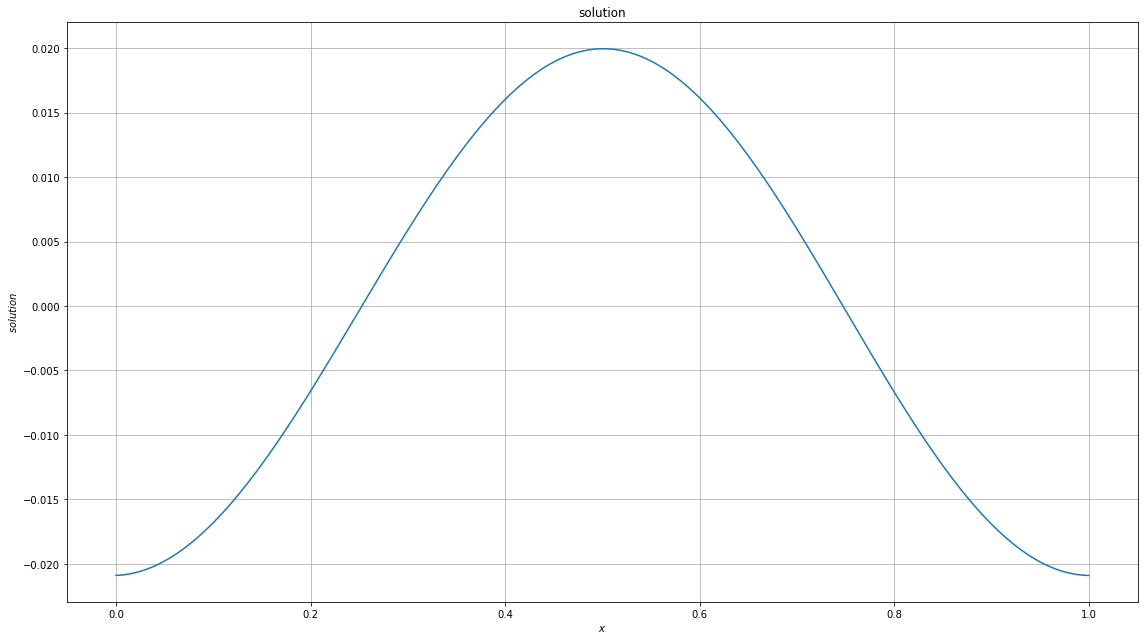

In [14]:
solution = np.linalg.solve(matrix, right)

plt.figure(figsize=[16, 9])
plt.plot(x, solution)

plt.title("solution")
plt.xlabel("$x$")
plt.ylabel("$solution$")
plt.grid()
plt.tight_layout() 
plt.show()